In [713]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers

In [714]:
df_train = pd.read_csv("Datasets\Anti_Anomaly_data/Anti_Anomaly_B6_df.csv")

In [715]:
df_train

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:15:00,2020-05-15,00:15:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.880811,24.421869,0.0
1,2020-05-15 00:30:00,2020-05-15,00:30:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.682055,24.427290,0.0
2,2020-05-15 00:45:00,2020-05-15,00:45:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.500589,24.420678,0.0
3,2020-05-15 01:00:00,2020-05-15,01:00:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.596148,25.088210,0.0
4,2020-05-15 01:15:00,2020-05-15,01:15:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.512740,25.317970,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2020-06-17 22:45:00,2020-06-17,22:45:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.511703,22.856201,0.0
2836,2020-06-17 23:00:00,2020-06-17,23:00:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.482282,22.744190,0.0
2837,2020-06-17 23:15:00,2020-06-17,23:15:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.354743,22.492245,0.0
2838,2020-06-17 23:30:00,2020-06-17,23:30:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.291048,22.373909,0.0


In [716]:
tf.keras.utils.set_random_seed(1024)

In [717]:
cleaned_df = df_train.copy()
cleaned_df

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:15:00,2020-05-15,00:15:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.880811,24.421869,0.0
1,2020-05-15 00:30:00,2020-05-15,00:30:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.682055,24.427290,0.0
2,2020-05-15 00:45:00,2020-05-15,00:45:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.500589,24.420678,0.0
3,2020-05-15 01:00:00,2020-05-15,01:00:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.596148,25.088210,0.0
4,2020-05-15 01:15:00,2020-05-15,01:15:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.215279e+09,0.0,0.0,26.512740,25.317970,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,2020-06-17 22:45:00,2020-06-17,22:45:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.511703,22.856201,0.0
2836,2020-06-17 23:00:00,2020-06-17,23:00:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.482282,22.744190,0.0
2837,2020-06-17 23:15:00,2020-06-17,23:15:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.354743,22.492245,0.0
2838,2020-06-17 23:30:00,2020-06-17,23:30:00,5,3,0.0,0.0,0.0,0.0,4306.0,0.0,1.215486e+09,0.0,0.0,23.291048,22.373909,0.0


In [718]:
features = ["TOTAL_YIELD","TIME_PERIOD","AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION"]
cleaned_df = cleaned_df[features]

In [719]:
cleaned_df

,TOTAL_YIELD,TIME_PERIOD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,1.215279e+09,1,26.880811,24.421869,0.0
1,1.215279e+09,1,26.682055,24.427290,0.0
2,1.215279e+09,1,26.500589,24.420678,0.0
3,1.215279e+09,1,26.596148,25.088210,0.0
4,1.215279e+09,1,26.512740,25.317970,0.0
...,...,...,...,...,...
2835,1.215486e+09,5,23.511703,22.856201,0.0
2836,1.215486e+09,5,23.482282,22.744190,0.0
2837,1.215486e+09,5,23.354743,22.492245,0.0
2838,1.215486e+09,5,23.291048,22.373909,0.0


In [720]:
df = cleaned_df.to_numpy().astype(np.float32)

In [721]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [722]:
class AutoEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(AutoEncoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(input_dim,)),
            layers.Reshape((input_dim, 1)),  # Reshape to 3D for Conv1D
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
        ])
        # Previously, I was using UpSampling. I am trying Transposed Convolution this time around.
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(latent_dim, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(input_dim)
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


input_dim = df.shape[-1]
latent_dim = 32

model = AutoEncoder(input_dim, latent_dim)
model.build((None, input_dim))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae")
model.summary()

Model: "auto_encoder_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_84 (Sequential)  (None, 1, 32)             63264     
                                                                 
 sequential_85 (Sequential)  (None, 5)                 66597     
                                                                 
Total params: 129861 (507.27 KB)
Trainable params: 128709 (502.77 KB)
Non-trainable params: 1152 (4.50 KB)
_________________________________________________________________


In [723]:
print(cleaned_df.shape)

(2840, 5)


In [724]:
epochs = 100
batch_size = 128
early_stopping = EarlyStopping(patience=10, min_delta=1e-3, monitor="val_loss", restore_best_weights=True)


history = model.fit(df, df, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
20/20 [==============================] - 6s 66ms/step - loss: 0.4805 - val_loss: 0.2429
Epoch 2/100
20/20 [==============================] - 0s 17ms/step - loss: 0.1153 - val_loss: 0.2239
Epoch 3/100
20/20 [==============================] - 1s 29ms/step - loss: 0.0915 - val_loss: 0.2342
Epoch 4/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0796 - val_loss: 0.2543
Epoch 5/100
20/20 [==============================] - 0s 21ms/step - loss: 0.0805 - val_loss: 0.2284
Epoch 6/100
20/20 [==============================] - 0s 19ms/step - loss: 0.0870 - val_loss: 0.2805
Epoch 7/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0875 - val_loss: 0.2573
Epoch 8/100
20/20 [==============================] - 0s 17ms/step - loss: 0.0820 - val_loss: 0.2216
Epoch 9/100
20/20 [==============================] - 0s 23ms/step - loss: 0.0799 - val_loss: 0.2517
Epoch 10/100
20/20 [==============================] - 0s 18ms/step - loss: 0.0800 - val_loss: 0.2540

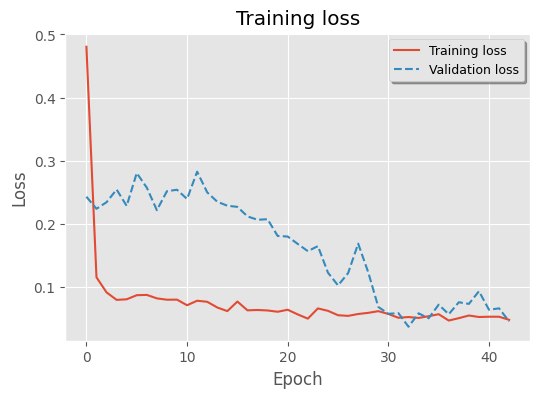

In [725]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("Training loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [726]:
# train_mae = model.evaluate(X_train, X_train, verbose=0)
test_mae = model.evaluate(df, df, verbose=0)
print("Testing dataset mae: ", test_mae)


Testing dataset mae:  0.043319378048181534


89/89 [==============================] - 1s 5ms/step


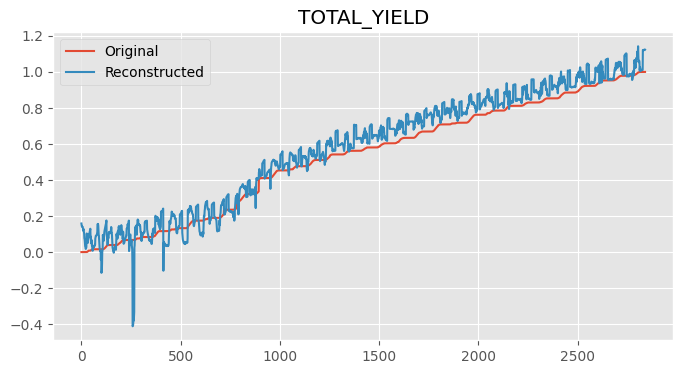

In [727]:
import matplotlib.pyplot as plt

reconstructed = model.predict(df)
for i in range(1):  # Plot for each feature
    plt.figure(figsize=(8, 4))
    plt.plot(df[:, i], label="Original")
    plt.plot(reconstructed[:, i], label="Reconstructed")
    plt.title(f"TOTAL_YIELD")
    plt.legend()
    plt.show()


In [728]:
reconstruction_errors = np.mean(np.abs(df - reconstructed), axis=1)

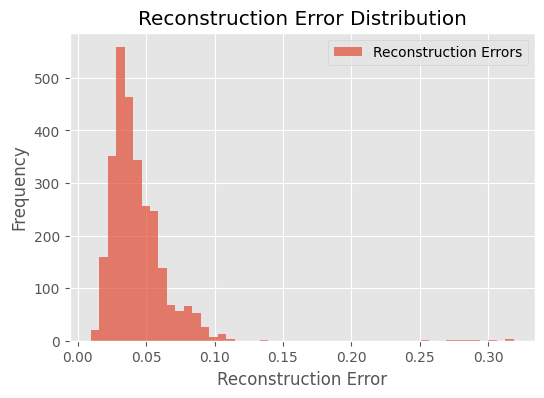

In [729]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="Reconstruction Errors")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [754]:
# List of DataFrame names for location_A
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

# Dictionary to store the imported DataFrames
location_A = {}

# Load each CSV file into a DataFrame
for df_name in df_names_A:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_A[df_name] = pd.read_csv(csv_filename)

# List of DataFrame names for location_B
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

# Dictionary to store the imported DataFrames
location_B = {}

# Load each CSV file into a DataFrame
for df_name in df_names_B:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_B[df_name] = pd.read_csv(csv_filename)

In [765]:
test_df = location_B["B6_df"].copy()

In [766]:
test = test_df.copy()
test = test[features]
test = test.to_numpy().astype(np.float32)
test = scaler.fit_transform(test)

In [767]:
reconstructed = model.predict(test)

102/102 [==============================] - 0s 4ms/step


In [768]:
reconstruction_errors = np.mean(np.abs(test - reconstructed), axis=1)

In [769]:
threshold = 0.1  # Slightly above testing MAE

In [770]:
anomalies = reconstruction_errors > threshold
anomaly_indexes = np.where(anomalies)[0]  # Returns an array of anomaly indexes

In [771]:
# Copy the original DataFrame to avoid overwriting
test_df['Is_Anomaly'] = False  # Initialize all as False

# Mark anomalies
test_df.loc[anomaly_indexes, 'Is_Anomaly'] = True

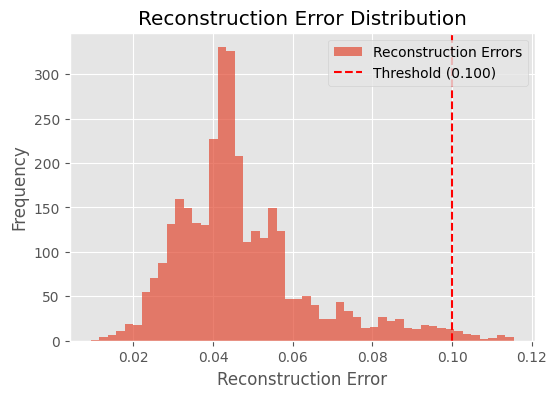

In [772]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="Reconstruction Errors")
plt.axvline(threshold, color='r', linestyle='--', label=f"Threshold ({threshold:.3f})")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


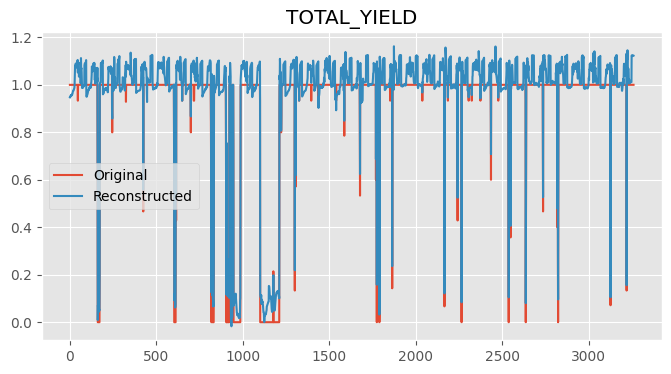

In [773]:
for i in range(1):  # Plot for each feature
    plt.figure(figsize=(8, 4))
    plt.plot(test[:, i], label="Original")
    plt.plot(reconstructed[:, i], label="Reconstructed")
    plt.title(f"TOTAL_YIELD")
    plt.legend()
    plt.show()

In [774]:
test_df[test_df['Is_Anomaly']].head(60)

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Is_Anomaly
41,2020-05-15 10:15:00,2020-05-15,10:15:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,0.000000e+00,32.437480,47.143508,0.874834,True
42,2020-05-15 10:30:00,2020-05-15,10:30:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,0.000000e+00,33.074135,48.680290,0.908056,True
43,2020-05-15 10:45:00,2020-05-15,10:45:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,0.000000e+00,33.192470,50.249560,0.943353,True
44,2020-05-15 11:00:00,2020-05-15,11:00:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,0.000000e+00,33.462057,51.610991,0.957900,True
45,2020-05-15 11:15:00,2020-05-15,11:15:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,0.000000e+00,34.251795,54.894302,0.970448,True
46,2020-05-15 11:30:00,2020-05-15,11:30:00,2,2,0.000000,0.000000,0.000000,0.000000,1535.333333,-109.666667,1.134262e+09,-8.101869e+07,-4.633809e+09,34.651455,56.083953,0.987932,True
47,2020-05-15 11:45:00,2020-05-15,11:45:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,109.666667,1.215280e+09,8.101869e+07,-2.342428e+09,35.151526,55.593795,0.953345,True
48,2020-05-15 12:00:00,2020-05-15,12:00:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,-0.000000e+00,35.166105,57.488241,0.946920,True
49,2020-05-15 12:15:00,2020-05-15,12:15:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,0.000000e+00,36.377571,57.588582,0.977188,True
50,2020-05-15 12:30:00,2020-05-15,12:30:00,2,2,0.000000,0.000000,0.000000,0.000000,1645.000000,0.000000,1.215280e+09,0.000000e+00,-0.000000e+00,35.966358,58.888153,0.956238,True
